<a href="https://colab.research.google.com/github/quantum-intelligence/computational-physics/blob/main/CP_Lecture16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Physics
Lecture 16: GPUs and Neural Networks

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score

Download data from :
https://archive.materialscloud.org/record/2019.0020/v1

Description of data and corresponding study can be found here:
https://www.nature.com/articles/s41598-020-72811-z

open and load "magneticmoment_Ef_data.csv" using pandas.
- save the file to your google drive (with colab) or your local drive (jupyter notebook).

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


verify mount and check path for the csv file. Change the path below as needed.

In [4]:
ls drive/MyDrive/Colab\ Notebooks

 2D_Ising.ipynb                             CP_Lecture6b.ipynb
'Computational Physics'/                    CP_Lecture6.ipynb
'Copy of 2021ComputeFest-NotebookToCloud'  'CP_Lecture6 solution.ipynb'
'Copy of 2D_Ising.ipynb'                    CP_Lecture_7.ipynb
'Copy of HW 1.ipynb'                        CP_Lecture8b.ipynb
'Copy of Intro_to_coding.ipynb'             CP_Lecture8.ipynb
 CP_Lecture10.ipynb                         CP_Lecture9.ipynb
 CP_Lecture11.ipynb                         CP_Lecture9_v2.ipynb
 CP_Lecture12.ipynb                        'HW 1.ipynb'
 CP_Lecture13.ipynb                         Intro_to_python.ipynb
'CP_Lecture 14.ipynb'                       magneticmoment_Ef_data.csv
 CP_Lecture15b.ipynb                       'nCr calculator'
 CP_Lecture15.ipynb                        'oldof CP_Lecture9.ipynb'
 CP_Lecture16.ipynb                         QP_demo1.ipynb
'CP_ Lecture1.ipynb'                        solutions/
 CP_Lecture2.ipynb                         'Solution

In [5]:
# Create dataframe of "magneticmoment_Ef_data.csv" using pandas.
# Change the path to magneticmoment_Ef_data.csv as needed.
data_path = "drive/MyDrive/Colab Notebooks/magneticmoment_Ef_data.csv"
df = pd.read_csv(data_path)

Explore the pandas object by examinging the columns:
- df.column()

A summary of the dataframe:
- df.head()


In [6]:
df.head(n=3)

,Unnamed: 0,formation_energy,elem_frac,elem_list,energy,formula,magnetic_moment,spin_index,num_p,num_d,num_f,atomic_rad,atomic_vol,covalent_rad,dipole,eaffinity,num_electrons,atomic_rad_sum_dif,atomic_rad_std_dif,atomic_rad_std,atomic_rad_avg,atomic_rad_max_dif,atomic_vol_sum_dif,atomic_vol_std_dif,atomic_vol_std,atomic_vol_avg,atomic_vol_max_dif,covalentrad_sum_dif,covalentrad_std_dif,covalentrad_std,covalentrad_avg,covalentrad_max_dif,dipole_sum_dif,dipole_std_dif,dipole_std,dipole_avg,dipole_max_dif,eaffinity_sum_dif,eaffinity_std_dif,eaffinity_std,...,numelectron_std_dif,numelectron_std,numelectron_avg,numelectron_max_dif,vdwradius_sum_dif,vdwradius_std_dif,vdwradius_std,vdwradius_avg,vdwradius_max_dif,e_negativity_sum_dif,e_negativity_std_dif,e_negativity_std,e_negativity_avg,e_negativity_max_dif,nvalence_sum_dif,nvalence_std_dif,nvalence_std,nvalence_avg,nvalence_max_dif,lastsubshell_avg,cmpd_skew_p,cmpd_skew_d,cmpd_skew_f,cmpd_sigma_p,cmpd_sigma_d,cmpd_sigma_f,frac_f,std_ion,sum_ion,mean_ion,Born,hardness_mean,hardness_var,Nup_mean,Nup_var,cs_bob,cs_PE,cs_IR,cs_AR,cs_OX
0,0,-1.152920,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Ge, Element T...",-46.782036,Cr1Co1Ge1Te6P1,2.816,1,4,9,0,"[130.0, 125.0, 137.0, 160.0, 128.0]","[7.23, 6.7, 13.6, 20.5, 17.0]","[122.0, 111.00000000000001, 121.0, 136.0, 111....","[78.4, 57.71, 39.43, 37.0, 24.93]","[0.6659999999999999, 0.66225646, 1.232712, 1.9...","[24, 27, 32, 52, 15]",158.0,0.997877,0.008629,148.0,35,74.740,0.628972,0.172140,16.753,13.8,122.0,0.775396,0.005853,128.1,25,255.30,0.672182,0.154617,42.247,53.47,6.367902,0.959120,0.228103,...,0.761414,0.168444,41.0,37,136.0,0.997729,0.002938,203.3,31,136.0,0.997729,0.002938,203.3,31,22.0,0.807851,0.077778,6.0,5,"[((3, 'd'), 3), ((3, 'd'), 6), ((4, 's'), 1), ...",0.0,0.0,0,1.0,0.666667,0,0,0.887472,43.439369,8.687874,824.839369,3.676485,0.392730,3.20,2.1600,42880.10573,966.64,13.905000,11.50,4917162.56
1,1,-1.325311,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Ge, Element Te]",-46.171992,Cr1Co1Ge2Te6,3.142,1,4,9,0,"[130.0, 125.0, 137.0, 160.0]","[7.23, 6.7, 13.6, 20.5]","[122.0, 111.00000000000001, 121.0, 136.0]","[78.4, 57.71, 39.43, 37.0]","[0.6659999999999999, 0.66225646, 1.232712, 1.9...","[24, 27, 32, 52]",168.0,0.831633,0.009426,148.9,35,71.655,0.762022,0.217875,16.413,13.8,114.0,0.756233,0.005281,129.1,25,213.72,0.745633,0.098059,43.697,41.40,6.738856,0.825943,0.224304,...,0.926019,0.104636,42.7,28,49.5,0.785124,0.000359,206.4,11,49.5,0.785124,0.000359,206.4,11,22.5,0.813333,0.081600,5.9,5,"[((3, 'd'), 3), ((3, 'd'), 6), ((4, 's'), 1), ...",0.0,0.0,0,1.0,0.666667,0,0,0.611701,33.353977,8.338494,824.567397,3.378096,0.045734,3.25,2.6875,44357.76082,984.88,12.438333,11.35,5087200.04
2,2,-1.458288,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Si, Element G...",-47.107590,Cr1Co1Si1Ge1Te6,3.149,1,4,9,0,"[130.0, 125.0, 132.0, 137.0, 160.0]","[7.23, 6.7, 12.1, 13.6, 20.5]","[122.0, 111.00000000000001, 115.99999999999999...","[78.4, 57.71, 37.31, 39.43, 37.0]","[0.6659999999999999, 0.66225646, 1.3895211, 1....","[24, 27, 14, 32, 52]",154.0,0.968081,0.007981,148.4,35,67.940,0.701470,0.173773,16.263,13.8,112.0,0.747848,0.004776,128.6,25,206.40,0.918620,0.104747,43.485,41.40,6.681520,0.686061,0.171739,...,0.746740,0.177650,40.9,38,52.0,0.738166,0.000352,206.3,11,52.0,0.738166,0.000352,206.3,11,24.0,0.822917,0.099881,5.9,5,"[((3, 'd'), 3), ((3, 'd'), 6), ((3, 's'), 1), ...",0.0,0.0,0,1.0,0.666667,0,0,0.551463,41.519819,8.303964,824.559724,3.378693,0.036589,3.00,2.4000,42715.38977,991.35,13.955000,11.00,4806565.92


In [7]:
#choose the appropriate set of descriptors here:
descriptor_list = ['num_p', 'num_d', 'num_f',
       'atomic_rad_sum_dif', 'atomic_rad_std_dif',
       'atomic_rad_std', 'atomic_rad_avg', 'atomic_rad_max_dif',
       'atomic_vol_sum_dif', 'atomic_vol_std_dif', 'atomic_vol_std',
       'atomic_vol_avg', 'atomic_vol_max_dif', 'covalentrad_sum_dif',
       'covalentrad_std_dif', 'covalentrad_std', 'covalentrad_avg',
       'covalentrad_max_dif', 'dipole_sum_dif', 'dipole_std_dif', 'dipole_std',
       'dipole_avg', 'dipole_max_dif', 'eaffinity_sum_dif',
       'eaffinity_std_dif', 'eaffinity_std', 'e_affinity_avg',
       'e_affinity_max_dif', 'numelectron_sum_dif', 'numelectron_std_dif',
       'numelectron_std', 'numelectron_avg', 'numelectron_max_dif',
       'vdwradius_sum_dif', 'vdwradius_std_dif', 'vdwradius_std',
       'vdwradius_avg', 'vdwradius_max_dif', 'e_negativity_sum_dif',
       'e_negativity_std_dif', 'e_negativity_std', 'e_negativity_avg',
       'e_negativity_max_dif', 'nvalence_sum_dif', 'nvalence_std_dif',
       'nvalence_std', 'nvalence_avg', 'nvalence_max_dif', 
       'cmpd_skew_p', 'cmpd_skew_d', 'cmpd_skew_f', 'cmpd_sigma_p',
       'cmpd_sigma_d', 'cmpd_sigma_f', 'frac_f ', 'std_ion', 'sum_ion',
       'mean_ion', 'Born', 'hardness_mean', 'hardness_var', 'Nup_mean',
       'Nup_var', 'cs_bob', 'cs_PE', 'cs_IR', 'cs_AR', 'cs_OX']

Consider the following target property, y and descriptors, X.

y --> 'formation_energy'

X --> descriptors in descriptor_list defined above...



- Create model input, X and labels, y
- Create a training set and a validation set

In [8]:
y = df['formation_energy'].values
X = df[descriptor_list]
X = np.asarray(X)
print("X.shape", X.shape)

X.shape (226, 68)


In [9]:
# code to create training/test set commended below:
test_size = 0.2 #test set split, e.g. 20% test set to 80% training set size...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [10]:
print('descriptor dimension:', X_train[0].shape)

descriptor dimension: (68,)


Create a Sequential model using Keras

In [11]:
model = keras.Sequential()
model.add(layers.Dense(20, input_dim=68, activation="relu"))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

Fit the model to the training data:

In [12]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/20
3/3 [==============================] - 1s 223ms/step - loss: 68498637824.0000 - mean_absolute_error: 226857.8477 - val_loss: 58692628480.0000 - val_mean_absolute_error: 219141.8281
Epoch 2/20
3/3 [==============================] - 0s 22ms/step - loss: 58571871232.0000 - mean_absolute_error: 211577.4297 - val_loss: 45434433536.0000 - val_mean_absolute_error: 192820.7656
Epoch 3/20
3/3 [==============================] - 0s 22ms/step - loss: 46732177408.0000 - mean_absolute_error: 191279.7617 - val_loss: 39436918784.0000 - val_mean_absolute_error: 179733.7031
Epoch 4/20
3/3 [==============================] - 0s 25ms/step - loss: 38035895296.0000 - mean_absolute_error: 167369.1523 - val_loss: 34209949696.0000 - val_mean_absolute_error: 167391.8438
Epoch 5/20
3/3 [==============================] - 0s 31ms/step - loss: 34235722752.0000 - mean_absolute_error: 161912.6719 - val_loss: 29384370176.0000 - val_mean_absolute_error: 155128.6562
Epoch 6/20
3/3 [============================

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                1380      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


Visualize the loss, model metrics as a function of epoch:

In [14]:
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


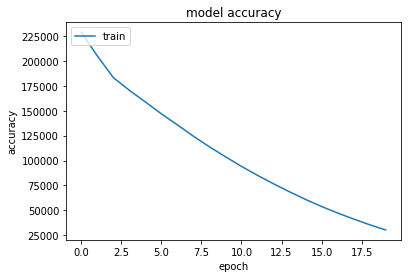

In [15]:
# summarize history for model metrics
plt.plot(history.history['mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

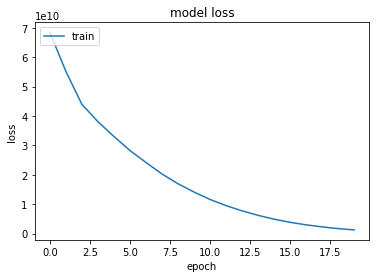

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model prediction and performance assessment:

In [17]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [18]:
r2 = r2_score(y_test, y_pred)
print('Test set R-square', r2)
r2 = r2_score(y_train, y_train_pred)
print('Training set R-square', r2)

Test set R-square -753961700.0916079
Training set R-square -748551134.9802226


TASKS:
- Inspect the loss/metric score after each epoch, what is happening?
- Plot the validation scores for the model metrics and the loss alongside the corresponding training set values shown above.
- Is the model overfitting?
- Experiment with the model architecture
  - i.e. tune the number of hidden layers and the number of hidden units.
- Use subset selection on the set of descriptors to improve your results
- Create a plot of the actual formation energy versus the predicted formation energy for both the training set and the test set.
- Compare the number of coefficients in the model to the number of data points. Is there a potential problem? What might that be?
- Is the maximum number of epochs used appropriate?

## Playing with GPUs
QUESTION:
- Time the NN training task for the CPU
- Switch to a GPU and time the NN training task for the GPU

(To change to a GPU, click on "Runtime" (in the menu above) and click on "Change Runtime type". Select the GPU option.)